In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from pathlib import Path
# load csv data
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

flowersPath = Path('/content/gdrive/Othercomputers/DavideLaptop/Desktop/IrisClassification')
iris = pd.read_csv(Path('/content/gdrive/Othercomputers/DavideLaptop/Desktop/IrisClassification/iris.csv'))

Mounted at /content/gdrive/


In [35]:
X = iris.drop('species', axis=1)

In [36]:
y = iris['species']

In [37]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [38]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

In [39]:
y = encoder.fit_transform(y)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [42]:
scaler = MinMaxScaler()

In [43]:
scaler.fit(X_train)

MinMaxScaler()

In [44]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [45]:
import tensorflow as tf
import keras

In [46]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras

In [98]:
model = Sequential()

model.add(Dense(units=4, activation='relu', input_shape=[4,]))
model.add(Dense(units=4, activation='relu', input_shape=[4,]))
model.add(Dense(units=4, activation='relu', input_shape=[4,]))
model.add(Dense(units=4, activation='relu', input_shape=[4,]))

model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [97]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=10)

In [96]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 20        
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 4)                 20        
                                                                 
 dense_24 (Dense)            (None, 3)                 15        
                                                                 
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________


metrics = pd.DataFrame(model.history.history)

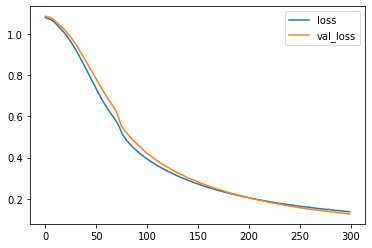

In [95]:
metrics[['loss', 'val_loss']].plot()

In [88]:
model.evaluate(scaled_X_test, y_test, verbose=0)

[1.0952614545822144, 0.2666666805744171]

In [89]:
epochs = len(metrics)
print(epochs)

300


In [91]:
scaled_X = scaler.fit_transform(X)

In [92]:
model = Sequential()

model.add(Dense(units=4, activation='relu', input_shape=[4,]))
model.add(Dense(units=4, activation='relu', input_shape=[4,]))
model.add(Dense(units=4, activation='relu', input_shape=[4,]))
model.add(Dense(units=4, activation='relu', input_shape=[4,]))

model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [94]:
model.fit(scaled_X, y, epsochs=epoch)

5/5 [==============================] - 0s 5ms/step - loss: 1.0801 - accuracy: 0.3400


In [67]:
model.save("final_iris_model.h5")

In [59]:
import joblib
joblib.dump(scaler, 'iris_scaler.pkl')

['iris_scaler.pkl']

In [60]:
from keras.models import load_model
flower_model = load_model('final_iris_model.h5')
flower_scaler = joblib.load("iris_scaler.pkl")

In [62]:
flower_test = {"sepal_length": 5.1,
                  "sepal_width": 3.5,
                  "petal_length": 1.4,
                  "petal_width": 0.2}

In [85]:
import numpy as np

def get_iris_prediction(model, scaler, request):
    sepal_length = request["sepal_length"]
    sepal_width = request["sepal_width"]
    petal_length = request["petal_length"]
    petal_width = request["petal_width"]
    
    flower = [[sepal_length, sepal_width, petal_length, petal_width]]
    flower = scaler.transform(flower)
    
    iris_classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    prediction = model.predict(flower)
    class_index = np.argmax(prediction, axis=1)
    print(iris_classes[class_index])

get_iris_prediction(flower_model, flower_scaler, flower_test)


['setosa']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
